# AIRBNB - Lake Tahoe

Source : http://tomslee.net/airbnb-data-collection-get-the-data

Location : Lake Tahoe

Survey dates: 2017-05-08 (4365 listings), 2017-06-29 (4342 listings)
    
    - Lily Elizabeth John

### Goal - To conduct exploratory analysis on AIRBNB listings in Lake Tahoe

-> Identify factors that influence reviews and Overall Satisfaction

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from os import listdir
from pylab import *

### Load Datasets

In [2]:
#List dataset filenames
listdir('lake_tahoe')

['tomslee_airbnb_lake_tahoe_1288_2017-05-08.csv',
 'tomslee_airbnb_lake_tahoe_1412_2017-06-29.csv']

In [3]:
#Read in datasets into dataframes
tahoe_may_2017_df=pd.read_csv(r'lake_tahoe/tomslee_airbnb_lake_tahoe_1288_2017-05-08.csv')
tahoe_june_2017_df=pd.read_csv(r'lake_tahoe/tomslee_airbnb_lake_tahoe_1412_2017-06-29.csv')

### Describe Datasets

In [4]:
#Describe dataset
print("Describe May 8, 2017 Survey")
print(tahoe_may_2017_df.shape)
print(tahoe_may_2017_df.head())
print(tahoe_may_2017_df.describe(),'\n')

print("Describe June 29, 2017 Survey")
print(tahoe_june_2017_df.shape)
print(tahoe_june_2017_df.head())
print(tahoe_june_2017_df.describe(),'\n')

Describe May 8, 2017 Survey
(4365, 20)
    room_id  survey_id   host_id        room_type  country        city  \
0  18721088       1288  17553340      Shared room      NaN  Lake Tahoe   
1  18628161       1288   3415785  Entire home/apt      NaN  Lake Tahoe   
2  18628116       1288   3415785  Entire home/apt      NaN  Lake Tahoe   
3  18628120       1288   3415785  Entire home/apt      NaN  Lake Tahoe   
4  18628163       1288   3415785  Entire home/apt      NaN  Lake Tahoe   

   borough neighborhood  reviews  overall_satisfaction  accommodates  \
0      NaN   Lake Tahoe        0                   0.0             1   
1      NaN   Lake Tahoe        4                   5.0            14   
2      NaN   Lake Tahoe        2                   0.0            16   
3      NaN   Lake Tahoe        2                   0.0            12   
4      NaN   Lake Tahoe       11                   5.0            10   

   bedrooms  bathrooms   price  minstay                                 name  \
0  

### Are there missing values in the dataset

In [5]:
#Are there missing values in the dataset
may_missing_df=pd.DataFrame(tahoe_may_2017_df.isnull().sum().sort_values(ascending=False))
may_missing_df.columns=['missing_count']
may_missing_df['missing_percentage']=(may_missing_df['missing_count']/tahoe_may_2017_df.shape[0])*100

june_missing_df=pd.DataFrame(tahoe_june_2017_df.isnull().sum().sort_values(ascending=False))
june_missing_df.columns=['missing_count']
june_missing_df['missing_percentage']=(june_missing_df['missing_count']/tahoe_june_2017_df.shape[0])*100

print("Missing values in May Survey")
print(may_missing_df,'\n')
print("Missing values in June Survey")
print(june_missing_df,'\n')

Missing values in May Survey
                      missing_count  missing_percentage
minstay                        4365               100.0
country                        4365               100.0
bathrooms                      4365               100.0
borough                        4365               100.0
location                          0                 0.0
reviews                           0                 0.0
survey_id                         0                 0.0
host_id                           0                 0.0
room_type                         0                 0.0
city                              0                 0.0
neighborhood                      0                 0.0
overall_satisfaction              0                 0.0
longitude                         0                 0.0
accommodates                      0                 0.0
bedrooms                          0                 0.0
price                             0                 0.0
name               

###### Notes:
    Both surveys have similar sample size and therefore results are comparable.
    Fields country, borough, bathrooms & minstay have 100% missing values and cannot be used.
    Latitudes and Longitudes are within the same range in both datasets and therefore seems not to have outliers in initial review.

### Plot property location using latitudes and longitudes

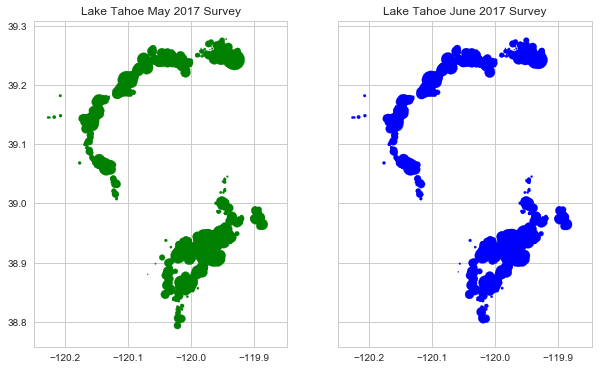

In [6]:
# Scatterplot of latitudes and longitudes

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,6))

# May Survey scatterplot
ax1.set_title("Lake Tahoe May 2017 Survey")
ax1.scatter(x=tahoe_may_2017_df.longitude,y=tahoe_may_2017_df.latitude,s=tahoe_may_2017_df.reviews,color='green')

# June Survey scatterplot
ax2.set_title("Lake Tahoe June 2017 Survey")
ax2.scatter(x=tahoe_june_2017_df.longitude,y=tahoe_june_2017_df.latitude,s=tahoe_june_2017_df.reviews,color='blue')

###### Notes:
    Both surveys have similar geographic distribution.

### Explore attributes

#### Number of people property can accommodate

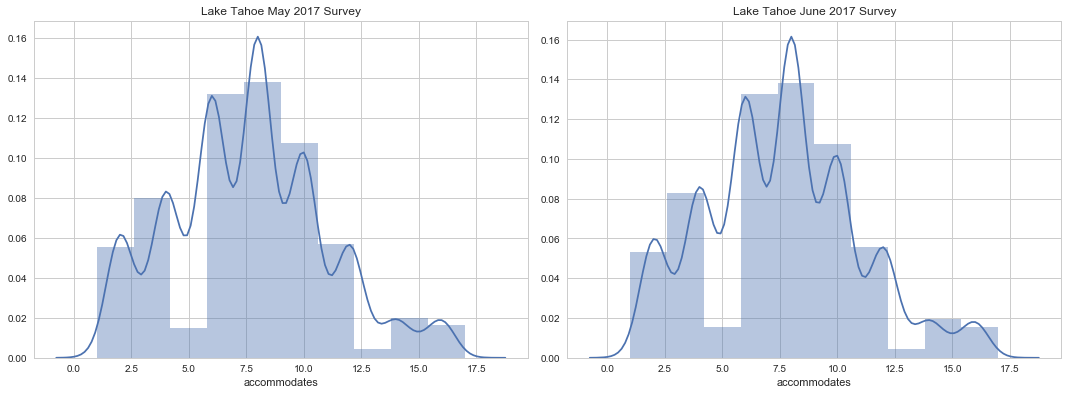

In [7]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title("Lake Tahoe May 2017 Survey")
sns.distplot(tahoe_may_2017_df.accommodates[tahoe_may_2017_df.accommodates<=20],bins=10)

plt.subplot(1,2,2)
plt.title("Lake Tahoe June 2017 Survey")
sns.distplot(tahoe_june_2017_df.accommodates[tahoe_june_2017_df.accommodates<=20],bins=10)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

###### Notes:
    Accomodation capacity follows a normal distribution.

#### Number of bedrooms

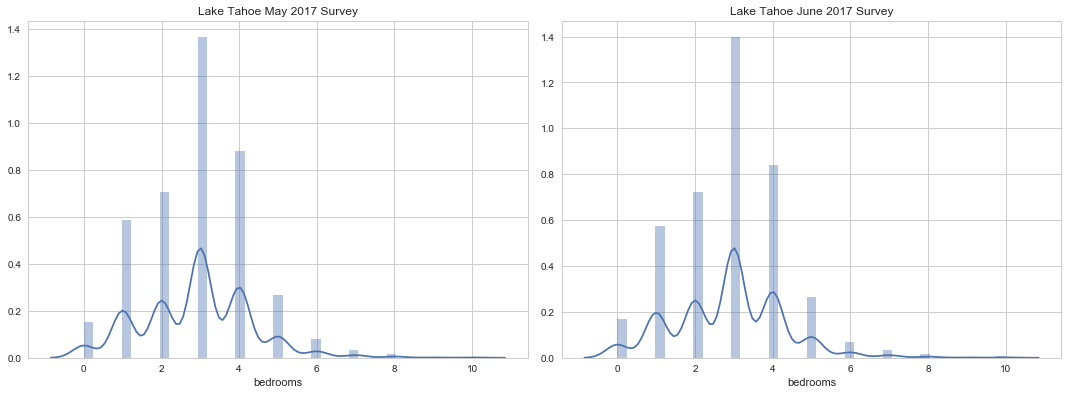

In [8]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title("Lake Tahoe May 2017 Survey")
sns.distplot(tahoe_may_2017_df.bedrooms)

plt.subplot(1,2,2)
plt.title("Lake Tahoe June 2017 Survey")
sns.distplot(tahoe_june_2017_df.bedrooms)    

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

###### Notes:
    High rate of listings for 3 bedrooms.
    Exhibits normal distribution

#### Price

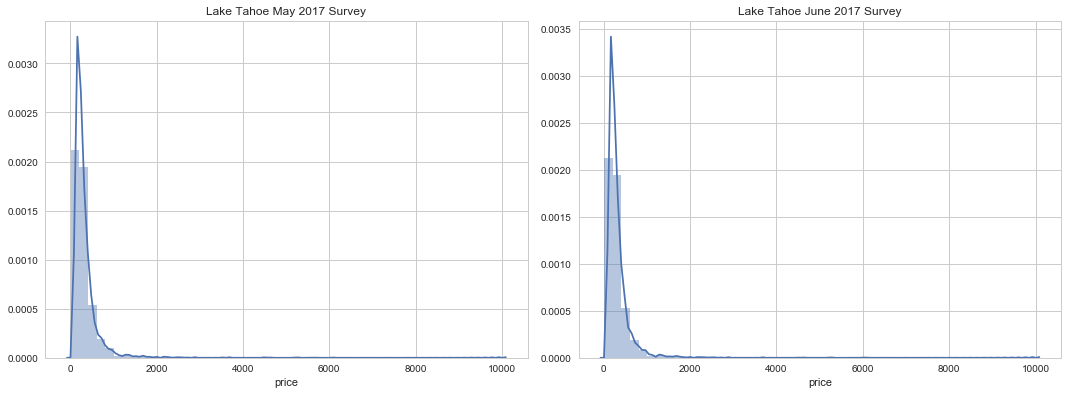

In [9]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title("Lake Tahoe May 2017 Survey")
sns.distplot(tahoe_may_2017_df.price)

plt.subplot(1,2,2)
plt.title("Lake Tahoe June 2017 Survey")
sns.distplot(tahoe_june_2017_df.price) 

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

#### Price for properties listed at less than $1500

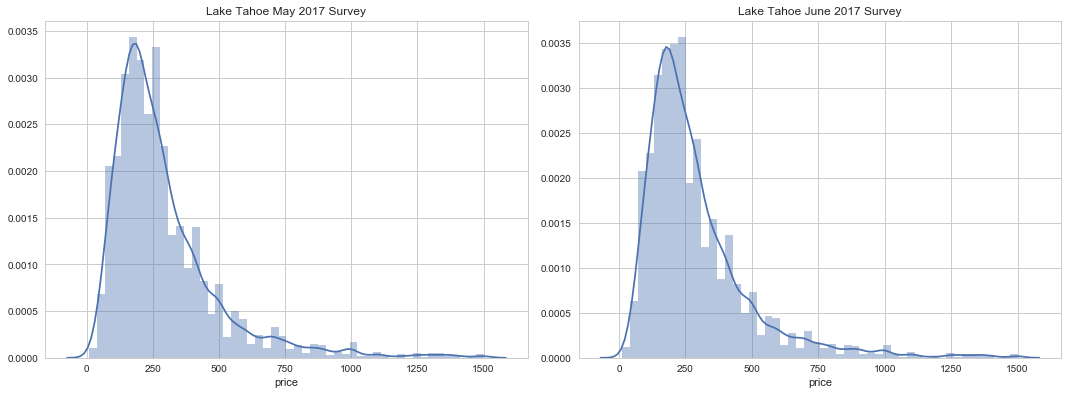

In [10]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title("Lake Tahoe May 2017 Survey")
sns.distplot(tahoe_may_2017_df.price[tahoe_may_2017_df.price<=1500])

plt.subplot(1,2,2)
plt.title("Lake Tahoe June 2017 Survey")
sns.distplot(tahoe_june_2017_df.price[tahoe_june_2017_df.price<=1500]) 

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

###### Notes:
    The distribution is positively skewed.
    Most listing are less than $500.
    
    There is high concentration of listing between $100 and $300.

#### Overall Satisfaction

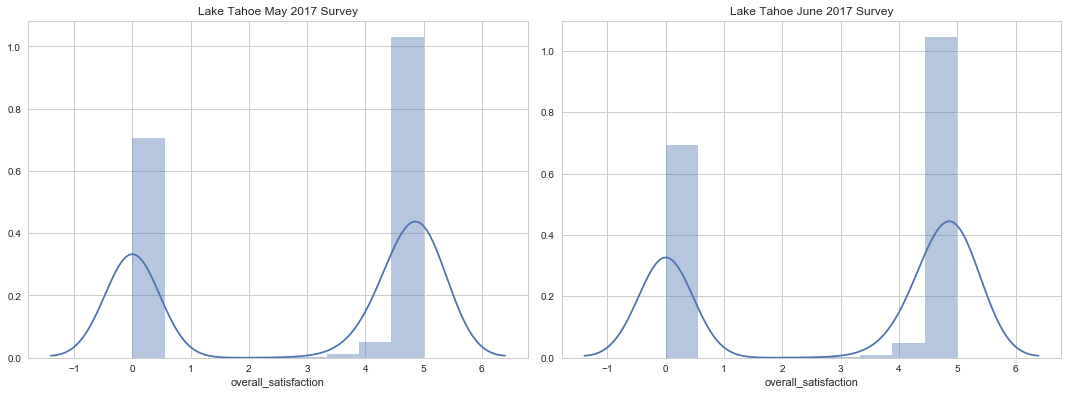

In [11]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title("Lake Tahoe May 2017 Survey")
sns.distplot(tahoe_may_2017_df.overall_satisfaction)

plt.subplot(1,2,2)
plt.title("Lake Tahoe June 2017 Survey")
sns.distplot(tahoe_june_2017_df.overall_satisfaction) 

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

###### Notes:
    Shows a bimodal distribution with either a rating of 5 or 0.

#### Reviews

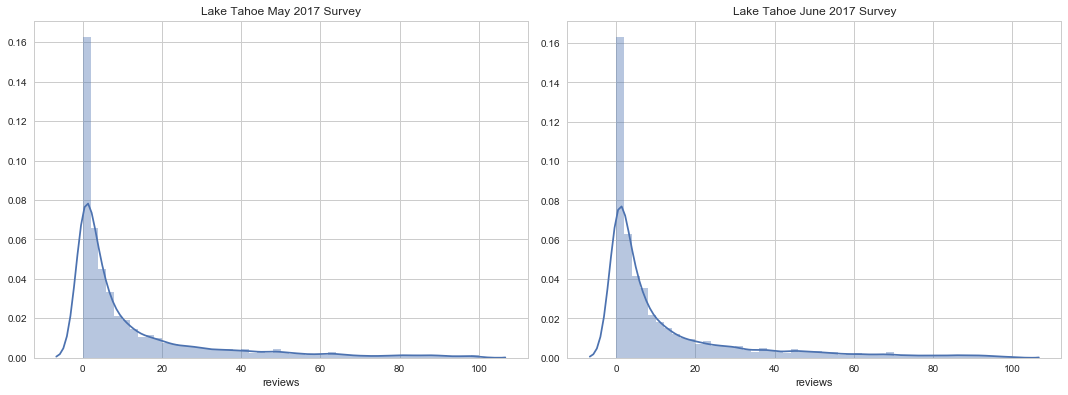

In [12]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title("Lake Tahoe May 2017 Survey")
sns.distplot(tahoe_may_2017_df.reviews[tahoe_may_2017_df.reviews<=100])

plt.subplot(1,2,2)
plt.title("Lake Tahoe June 2017 Survey")
sns.distplot(tahoe_june_2017_df.reviews[tahoe_june_2017_df.reviews<=100]) 

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

###### Notes:
    16% of listings dont have any reviews

### Correlation - Heatmap

In [20]:
tahoe_may_2017_heatmap_df=tahoe_may_2017_df[['reviews','room_type','overall_satisfaction','accommodates','bedrooms','price']]
tahoe_june_2017_heatmap_df=tahoe_june_2017_df[['reviews','room_type','overall_satisfaction','accommodates','bedrooms','price']]

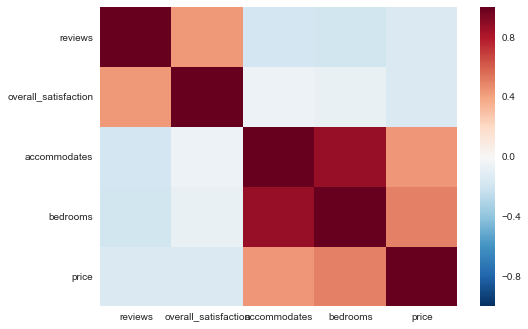

In [21]:
corr_may=tahoe_may_2017_heatmap_df.corr()
sns.heatmap(corr_may)

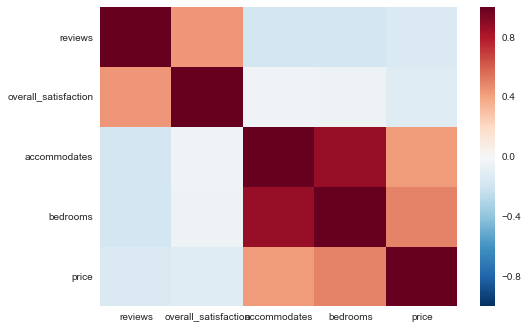

In [23]:
corr_june=tahoe_june_2017_heatmap_df.corr()
sns.heatmap(corr_june)